<a href="https://colab.research.google.com/github/ridvan5886/-Linear-Regression-Project-with-Teams-US-Home-Prices/blob/main/Building_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Recommendation System

In today’s world, information is everywhere. It has a ton of advantages, but it does not mean that it comes with zero cost. On the contrary, information overload is a serious problem as consumers can feel overwhelmed and either decide not to buy anything or do not take all options into account. To remedy this problem, a big food company for which you are working as data scientist wants to develop a recommendation system (RS) to provide better service to its customers.

RS can be defined as a system that makes personalized recommendations from a large range of different options by implicitly or explicitly eliciting the user’s preference for a product. RS benefits consumers as they reduce consumers' effort and search costs by making the decision process quick, easier, and painless.

As a data scientist at a big food company, I am asked to run item. Basically, user-based recommendation is a technique used to predict the items that a user might like based on ratings given to that item by the other users who have similar taste with that of the target user.

For this task, you are provided ‘recom.csv’ dataset. In this dataset, you have following columns:

•	Main_ID (Customer ID)
•	Transaction_ID
•	Date
•	Price
•	Code_Product
•	Amount (Order Amount)
•	ItemKey

Well, using this data, you are asked to generate a dataframe in which you recommend an item (or items) for each user.

### *Methodology:*

Data Mining, Analysis and Visualization of Retail Sales Data.

Market Basket Analysis (MBA), which aims to find relationship and establishing pattens within the retail sales data.
Customer Segmentation
RFM (recency, frequency, monetary) Analysis
Cohort analysis
Product Recomendation (people who bought this also bought)
In addition,
We create a Streamlit interactive data visualization tool that allows users interact with the data and analytics.

### Data Collection

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display, HTML

import calendar
import datetime as dt

import re

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
! gdown --id 1DIv8bn_BUJtVUR_HpirFhrb02M_FlGI-

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1DIv8bn_BUJtVUR_HpirFhrb02M_FlGI-
To: /content/Building-Recommendation-System.csv
100% 3.52M/3.52M [00:00<00:00, 56.8MB/s]


In [ ]:
#Uploading data in csv format
df = pd.read_csv("/content/Building-Recommendation-System.csv", index_col=False)

In [ ]:
df.info()

NameError: ignored

In [ ]:
df.head()

,Unnamed: 0,Main_ID,Transaction_ID,Date,Price,Code_Product,Amount,ItemKey
0,0,90fada91,264f7a69,2022-10-07 20:53:49.153,125.0,5002.0,1.0,5002.0
1,1,9006f9ac,45c7d853,2022-09-17 15:54:57.187,19.0,35012.0,1.0,NaN
2,2,32270891,61ad76dd,2022-11-28 13:51:55.667,141.0,5005.0,1.0,5005.0
3,3,97e03e47,41ee09f6,2022-09-12 16:20:22.110,4.5,35078.5,1.0,NaN
4,4,41949228,244fe6d8,2022-10-14 18:53:43.933,129.5,49291.5,5.0,NaN


In [ ]:
df.columns

Index(['Unnamed: 0', 'Main_ID', 'Transaction_ID', 'Date', 'Price',
       'Code_Product', 'Amount', 'ItemKey'],
      dtype='object')

In [ ]:
df.describe()

,Unnamed: 0,Price,Code_Product,Amount,ItemKey
count,50000.000000,50000.000000,50000.000000,50000.000000,28597.000000
mean,24999.500000,62.560670,32379.293540,1.232640,20775.740952
std,14433.901067,68.269624,21697.500334,0.749353,16481.882853
min,0.000000,0.500000,5000.500000,1.000000,5000.500000
25%,12499.750000,24.500000,10013.000000,1.000000,5011.500000
50%,24999.500000,45.500000,40009.500000,1.000000,10023.000000
75%,37499.250000,83.000000,49291.500000,1.000000,40028.500000
max,49999.000000,2525.500000,350027.500000,54.000000,57035.500000


In [ ]:
df.shape

(50000, 8)

In [ ]:
df.dtypes

Unnamed: 0          int64
Main_ID            object
Transaction_ID     object
Date               object
Price             float64
Code_Product      float64
Amount            float64
ItemKey           float64
dtype: object

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Main_ID', 'Transaction_ID', 'Date', 'Price',
       'Code_Product', 'Amount', 'ItemKey'],
      dtype='object')

In [ ]:
# Splitting up numerical & categorical columns
df_categorical = df.select_dtypes(include='object')
df_numerical = df.select_dtypes(exclude='object')

In [ ]:
df_categorical.describe()

,Main_ID,Transaction_ID,Date
count,50000,50000,50000
unique,28514,48403,48398
top,751131ee,9e0891a8,2022-10-11 15:20:14.997
freq,51,3,3


In [ ]:
df.isnull().sum()

Unnamed: 0            0
Main_ID               0
Transaction_ID        0
Date                  0
Price                 0
Code_Product          0
Amount                0
ItemKey           21403
dtype: int64

# **Clean Up to Data**

### Now the next step is data cleaning and feature engineering for this step we need to do a lot of stuff with the data such as:

#### 1. Deleting Unnecessary Columns
#### 2. Removing the Duplicates
#### 3. Remove the NaN values from the dataset
#### 4. Change data types and convert better formats
#### 4. Changing the column names
#### 5. Data Transformations
#### 6. Data Cleaning
#### 7. Adjust the column names Now, let’s perform all the above steps in our data:

In [ ]:
df = df[['Main_ID', 'Date', 'Price',
       'Code_Product', 'Amount', 'Transaction_ID']]

In [ ]:
df.duplicated().sum()

171

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Main_ID           0
Date              0
Price             0
Code_Product      0
Amount            0
Transaction_ID    0
dtype: int64

In [ ]:
df.isna().sum()

Main_ID           0
Date              0
Price             0
Code_Product      0
Amount            0
Transaction_ID    0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,Main_ID,Date,Price,Code_Product,Amount,Transaction_ID
0,90fada91,2022-10-07 20:53:49.153,125.0,5002.0,1.0,264f7a69
1,9006f9ac,2022-09-17 15:54:57.187,19.0,35012.0,1.0,45c7d853
2,32270891,2022-11-28 13:51:55.667,141.0,5005.0,1.0,61ad76dd
3,97e03e47,2022-09-12 16:20:22.110,4.5,35078.5,1.0,41ee09f6
4,41949228,2022-10-14 18:53:43.933,129.5,49291.5,5.0,244fe6d8


In [ ]:
df.shape

(49829, 6)

In [ ]:
# Checking unique values and their frequencies in categorical variables
categorical_cols = ['Code_Product']
for col in categorical_cols:
    unique_values = df[col].unique()
    value_counts = df[col].value_counts()
    print(f"Unique values in {col}:")
    print(unique_values)
    print(f"\nValue counts in {col}:")
    print(value_counts)
    print("-------------------------------")

Unique values in Code_Product:
[  5002.   35012.    5005.   35078.5  49291.5   5012.   49292.    5011.5
   5025.   10032.5   5009.   35096.5  40069.5  45004.   48504.5  25003.5
  30014.5  15016.5  10013.   40021.5  40009.5   5000.5  45001.   40030.
  45003.5  10004.   45002.5   5017.   30008.5  30014.   48589.   45013.
  40028.5  35090.   48513.   35076.5  40054.5   5027.   25003.   45001.5
   5027.5  49556.   10003.   48523.5  35000.5  49356.   35076.   10022.5
  40002.5  35006.5   5001.5  48556.5  45003.   49130.   30029.5  35077.
  35071.5  30003.   35001.   35049.5  45000.5  49129.5  10015.  160010.
  30008.   40029.   40001.5  10021.5  30027.   30009.   30002.   25004.
   5001.   40072.   15004.   49427.5  49567.5  40036.   35075.5  10023.
  35019.5  10001.   35042.5  30021.5  20007.   49483.   40019.   10023.5
   5004.5  35088.   40054.   35005.   45004.5  30009.5  10015.5  35006.
  10021.   40051.   10022.   40002.    5011.    5023.   48550.   35106.
  48555.   35078.   40029.5 

In [ ]:
df['Amount'] = df['Amount'].astype(int)


In [ ]:
df

,Main_ID,Date,Price,Code_Product,Amount,Transaction_ID
0,90fada91,2022-10-07 20:53:49.153,125.0,5002.0,1,264f7a69
1,9006f9ac,2022-09-17 15:54:57.187,19.0,35012.0,1,45c7d853
2,32270891,2022-11-28 13:51:55.667,141.0,5005.0,1,61ad76dd
3,97e03e47,2022-09-12 16:20:22.110,4.5,35078.5,1,41ee09f6
4,41949228,2022-10-14 18:53:43.933,129.5,49291.5,5,244fe6d8
...,...,...,...,...,...,...
49995,bb127ffb,2022-09-24 21:48:20.847,111.5,45004.0,4,4e0eb5ab
49996,a8bc484a,2022-11-18 19:49:01.973,34.0,49292.0,1,c9946c16
49997,c983862a,2022-11-24 20:02:43.023,178.0,5001.5,1,d1a35c5c
49998,8821da12,2022-11-06 13:07:01.423,26.0,49291.5,1,66f9b474


In [ ]:
import datetime

In [ ]:
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x).date())

In [ ]:
df

,Main_ID,Date,Price,Code_Product,Amount,Transaction_ID
0,90fada91,2022-10-07,125.0,5002.0,1,264f7a69
1,9006f9ac,2022-09-17,19.0,35012.0,1,45c7d853
2,32270891,2022-11-28,141.0,5005.0,1,61ad76dd
3,97e03e47,2022-09-12,4.5,35078.5,1,41ee09f6
4,41949228,2022-10-14,129.5,49291.5,5,244fe6d8
...,...,...,...,...,...,...
49995,bb127ffb,2022-09-24,111.5,45004.0,4,4e0eb5ab
49996,a8bc484a,2022-11-18,34.0,49292.0,1,c9946c16
49997,c983862a,2022-11-24,178.0,5001.5,1,d1a35c5c
49998,8821da12,2022-11-06,26.0,49291.5,1,66f9b474


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['day_of_week'] = df['Date'].dt.dayofweek

In [ ]:
df

,Main_ID,Date,Price,Code_Product,Amount,Transaction_ID,day_of_week
0,90fada91,2022-10-07,125.0,5002.0,1,264f7a69,4
1,9006f9ac,2022-09-17,19.0,35012.0,1,45c7d853,5
2,32270891,2022-11-28,141.0,5005.0,1,61ad76dd,0
3,97e03e47,2022-09-12,4.5,35078.5,1,41ee09f6,0
4,41949228,2022-10-14,129.5,49291.5,5,244fe6d8,4
...,...,...,...,...,...,...,...
49995,bb127ffb,2022-09-24,111.5,45004.0,4,4e0eb5ab,5
49996,a8bc484a,2022-11-18,34.0,49292.0,1,c9946c16,4
49997,c983862a,2022-11-24,178.0,5001.5,1,d1a35c5c,3
49998,8821da12,2022-11-06,26.0,49291.5,1,66f9b474,6


In [ ]:
df.head()

,Main_ID,Date,Price,Code_Product,Amount,Transaction_ID,day_of_week
0,90fada91,2022-10-07,125.0,5002.0,1,264f7a69,4
1,9006f9ac,2022-09-17,19.0,35012.0,1,45c7d853,5
2,32270891,2022-11-28,141.0,5005.0,1,61ad76dd,0
3,97e03e47,2022-09-12,4.5,35078.5,1,41ee09f6,0
4,41949228,2022-10-14,129.5,49291.5,5,244fe6d8,4


In [ ]:
df = df.rename(columns={'Price': 'Unit Price'})

In [ ]:
df

,Main_ID,Date,Unit Price,Code_Product,Amount,Transaction_ID,day_of_week
0,90fada91,2022-10-07,125.0,5002.0,1,264f7a69,4
1,9006f9ac,2022-09-17,19.0,35012.0,1,45c7d853,5
2,32270891,2022-11-28,141.0,5005.0,1,61ad76dd,0
3,97e03e47,2022-09-12,4.5,35078.5,1,41ee09f6,0
4,41949228,2022-10-14,129.5,49291.5,5,244fe6d8,4
...,...,...,...,...,...,...,...
49995,bb127ffb,2022-09-24,111.5,45004.0,4,4e0eb5ab,5
49996,a8bc484a,2022-11-18,34.0,49292.0,1,c9946c16,4
49997,c983862a,2022-11-24,178.0,5001.5,1,d1a35c5c,3
49998,8821da12,2022-11-06,26.0,49291.5,1,66f9b474,6


In [ ]:
# calculate total price column
df['Total price'] = df['Unit Price'] * df['Amount']

In [ ]:
df

,Main_ID,Date,Unit Price,Code_Product,Amount,Transaction_ID,day_of_week,Total price
0,90fada91,2022-10-07,125.0,5002.0,1,264f7a69,4,125.0
1,9006f9ac,2022-09-17,19.0,35012.0,1,45c7d853,5,19.0
2,32270891,2022-11-28,141.0,5005.0,1,61ad76dd,0,141.0
3,97e03e47,2022-09-12,4.5,35078.5,1,41ee09f6,0,4.5
4,41949228,2022-10-14,129.5,49291.5,5,244fe6d8,4,647.5
...,...,...,...,...,...,...,...,...
49995,bb127ffb,2022-09-24,111.5,45004.0,4,4e0eb5ab,5,446.0
49996,a8bc484a,2022-11-18,34.0,49292.0,1,c9946c16,4,34.0
49997,c983862a,2022-11-24,178.0,5001.5,1,d1a35c5c,3,178.0
49998,8821da12,2022-11-06,26.0,49291.5,1,66f9b474,6,26.0


In [ ]:
df.isnull().sum()

Main_ID           0
Date              0
Unit Price        0
Code_Product      0
Amount            0
Transaction_ID    0
day_of_week       0
Total price       0
dtype: int64

In [ ]:
df['Month'] = df['Date'].dt.month

In [ ]:
df

,Main_ID,Date,Unit Price,Code_Product,Amount,Transaction_ID,day_of_week,Total price,Month
0,90fada91,2022-10-07,125.0,5002.0,1,264f7a69,4,125.0,10
1,9006f9ac,2022-09-17,19.0,35012.0,1,45c7d853,5,19.0,9
2,32270891,2022-11-28,141.0,5005.0,1,61ad76dd,0,141.0,11
3,97e03e47,2022-09-12,4.5,35078.5,1,41ee09f6,0,4.5,9
4,41949228,2022-10-14,129.5,49291.5,5,244fe6d8,4,647.5,10
...,...,...,...,...,...,...,...,...,...
49995,bb127ffb,2022-09-24,111.5,45004.0,4,4e0eb5ab,5,446.0,9
49996,a8bc484a,2022-11-18,34.0,49292.0,1,c9946c16,4,34.0,11
49997,c983862a,2022-11-24,178.0,5001.5,1,d1a35c5c,3,178.0,11
49998,8821da12,2022-11-06,26.0,49291.5,1,66f9b474,6,26.0,11


In [ ]:
# Find duplicates based on all columns
duplicates = df.duplicated(keep=False)

# Mark duplicates in a new column
df['Duplicate'] = duplicates

# Print the updated dataset
print(df)

        Main_ID       Date  Unit Price  Code_Product  Amount Transaction_ID  \
0      90fada91 2022-10-07       125.0        5002.0       1       264f7a69   
1      9006f9ac 2022-09-17        19.0       35012.0       1       45c7d853   
2      32270891 2022-11-28       141.0        5005.0       1       61ad76dd   
3      97e03e47 2022-09-12         4.5       35078.5       1       41ee09f6   
4      41949228 2022-10-14       129.5       49291.5       5       244fe6d8   
...         ...        ...         ...           ...     ...            ...   
49995  bb127ffb 2022-09-24       111.5       45004.0       4       4e0eb5ab   
49996  a8bc484a 2022-11-18        34.0       49292.0       1       c9946c16   
49997  c983862a 2022-11-24       178.0        5001.5       1       d1a35c5c   
49998  8821da12 2022-11-06        26.0       49291.5       1       66f9b474   
49999  7f281f91 2022-10-10        52.0       45001.5       1       0ff8b41f   

       day_of_week  Total price  Month  Duplicate  

In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Print the updated dataset
print(df)

        Main_ID       Date  Unit Price  Code_Product  Amount Transaction_ID  \
0      90fada91 2022-10-07       125.0        5002.0       1       264f7a69   
1      9006f9ac 2022-09-17        19.0       35012.0       1       45c7d853   
2      32270891 2022-11-28       141.0        5005.0       1       61ad76dd   
3      97e03e47 2022-09-12         4.5       35078.5       1       41ee09f6   
4      41949228 2022-10-14       129.5       49291.5       5       244fe6d8   
...         ...        ...         ...           ...     ...            ...   
49824  bb127ffb 2022-09-24       111.5       45004.0       4       4e0eb5ab   
49825  a8bc484a 2022-11-18        34.0       49292.0       1       c9946c16   
49826  c983862a 2022-11-24       178.0        5001.5       1       d1a35c5c   
49827  8821da12 2022-11-06        26.0       49291.5       1       66f9b474   
49828  7f281f91 2022-10-10        52.0       45001.5       1       0ff8b41f   

       day_of_week  Total price  Month  Duplicate  

In [ ]:
# Rename the column from 'Main_ID' to 'User_ID'
df.rename(columns={'Main_ID': 'User_ID'}, inplace=True)
df.head()

,User_ID,Date,Unit Price,Code_Product,Amount,Transaction_ID,day_of_week,Total price,Month,Duplicate
0,90fada91,2022-10-07,125.0,5002.0,1,264f7a69,4,125.0,10,False
1,9006f9ac,2022-09-17,19.0,35012.0,1,45c7d853,5,19.0,9,False
2,32270891,2022-11-28,141.0,5005.0,1,61ad76dd,0,141.0,11,False
3,97e03e47,2022-09-12,4.5,35078.5,1,41ee09f6,0,4.5,9,False
4,41949228,2022-10-14,129.5,49291.5,5,244fe6d8,4,647.5,10,False


# **Visualizing**

In [ ]:
# Convert "Date" column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Find the start and end dates of sales
sales_start_date = df['Date'].min()
sales_end_date = df['Date'].max()

print("Sales start date:", sales_start_date)
print("Sales end date:", sales_end_date)

Sales start date: 2022-08-26 00:00:00
Sales end date: 2022-12-03 00:00:00


<ipython-input-107-77490b8a522c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


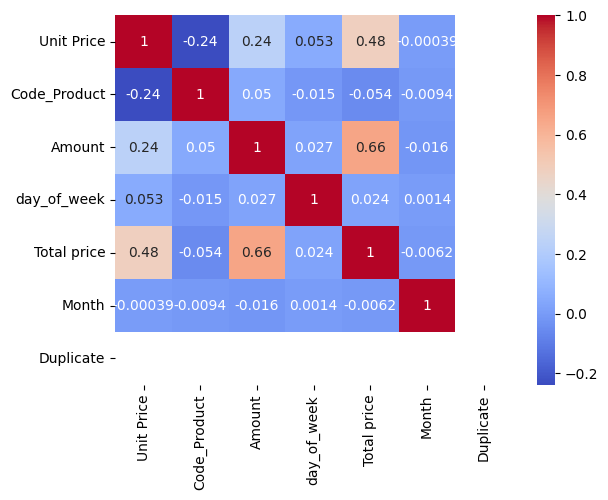

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [ ]:
df['Month'] = df['Date'].dt.month

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

In [ ]:
monthly_sales = df.groupby('Month')['Amount'].sum()
monthly_sales

Month
8      2733
9     14065
10    20763
11    22264
12     1632
Name: Amount, dtype: int64

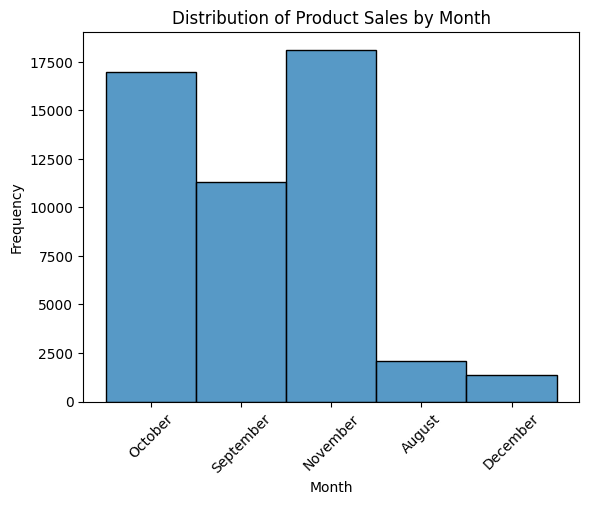

In [ ]:
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

# Map month numbers to month names
df['Month'] = df['Month'].apply(lambda x: calendar.month_name[x])

# Create a histogram of the monthly product sales
sns.histplot(data=df, x='Month')

# Set the x-axis label
plt.xlabel('Month')

# Set the y-axis label
plt.ylabel('Frequency')

# Set the plot title
plt.title('Distribution of Product Sales by Month')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

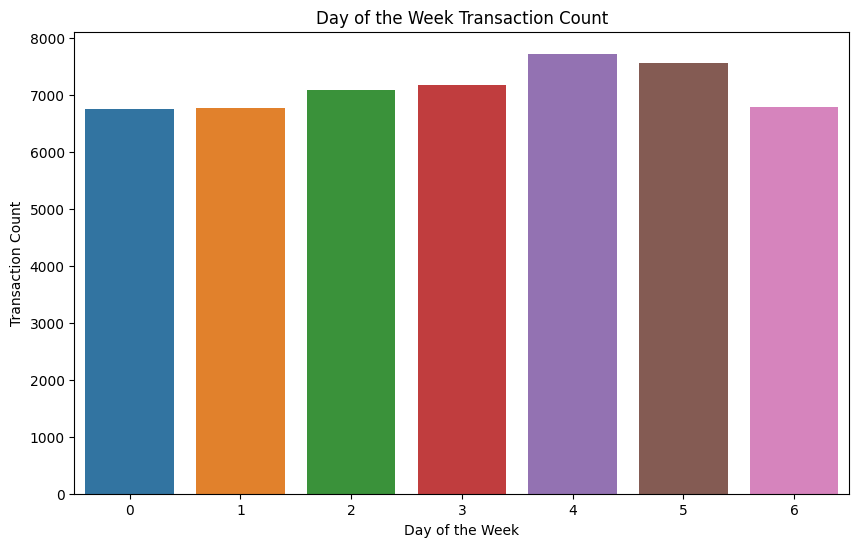

In [ ]:
# It's Day of the week transaction count
day_counts = df.groupby(df['Date'].dt.dayofweek)['Transaction_ID'].count()
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Count')
plt.title('Day of the Week Transaction Count')
plt.show()

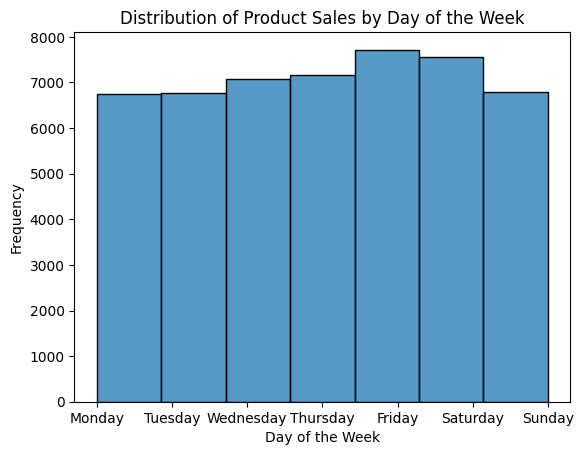

In [ ]:
# Create a histogram of product sales by day of the week
sns.histplot(data=df, x='day_of_week', bins=7)

# Set the x-axis label
plt.xlabel('Day of the Week')

# Set the y-axis label
plt.ylabel('Frequency')

# Set the plot title
plt.title('Distribution of Product Sales by Day of the Week')

# Set the x-axis tick labels
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Show the plot
plt.show()

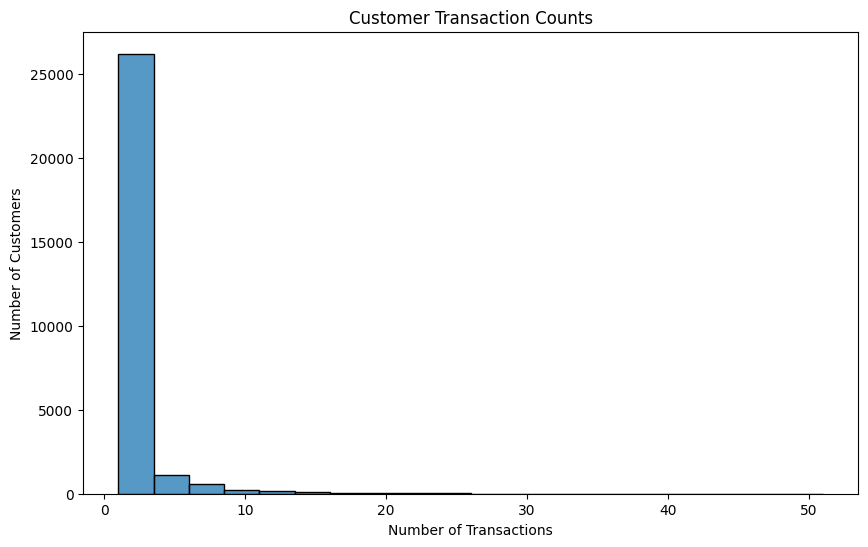

In [ ]:
# It's Customer analysis
customer_counts = df['User_ID'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(customer_counts, bins=20)
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.title('Customer Transaction Counts')
plt.show()

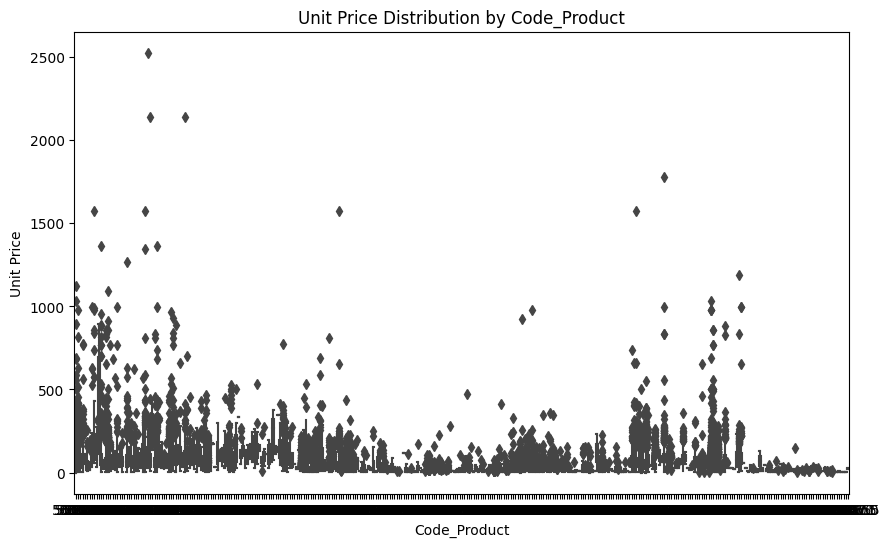

In [ ]:
# It's Price analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Code_Product', y='Unit Price', data=df)
plt.xlabel('Code_Product')
plt.ylabel('Unit Price')
plt.title('Unit Price Distribution by Code_Product')
plt.show()

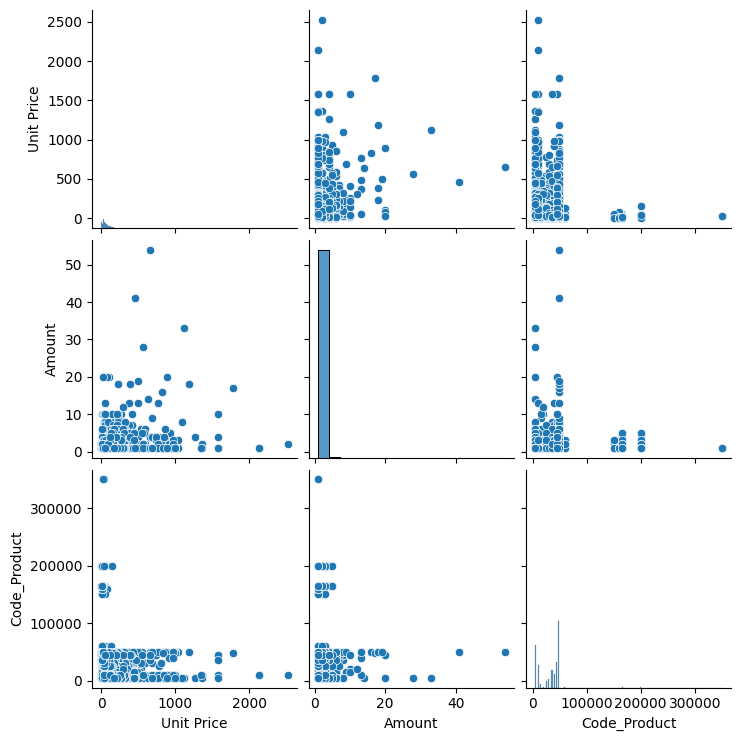

In [ ]:
#It's Pairwise scatter plot
sns.pairplot(df[['Unit Price', 'Amount', 'Code_Product']])
plt.show()

In [ ]:
# Calculate the number of User_ID
num_user_id = df['User_ID'].nunique()

# Print the result
print("Number of User_ID:", num_user_id)

Number of User_ID: 28514


In [ ]:
df. shape

(49829, 10)

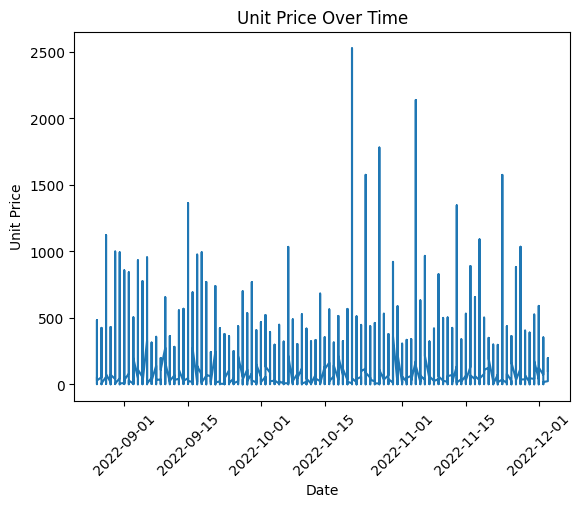

In [ ]:
# Sort the dataframe by Date
df.sort_values('Date', inplace=True)

# Plot the line graph
plt.plot(df['Date'], df['Unit Price'])
plt.xlabel('Date')
plt.ylabel('Unit Price')
plt.title('Unit Price Over Time')
plt.xticks(rotation=45)
plt.show()

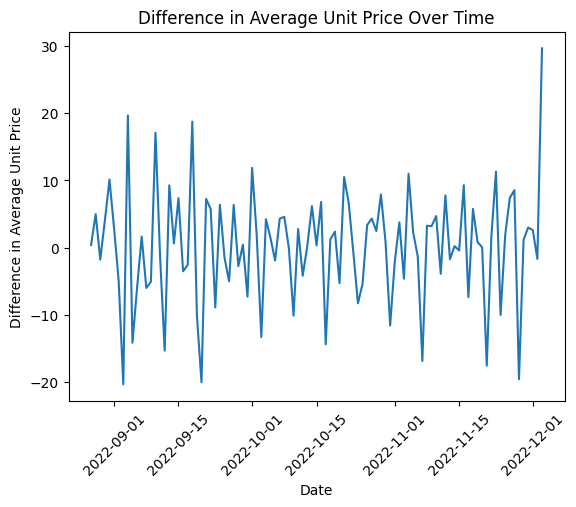

In [ ]:
# Calculate the average unit price for each unique date
average_unit_price = df.groupby('Date')['Unit Price'].mean()

# Calculate the difference in average unit price between consecutive dates
price_diff = average_unit_price.diff()

# Plot the line graph
plt.plot(average_unit_price.index, price_diff)
plt.xlabel('Date')
plt.ylabel('Difference in Average Unit Price')
plt.title('Difference in Average Unit Price Over Time')
plt.xticks(rotation=45)
plt.show()

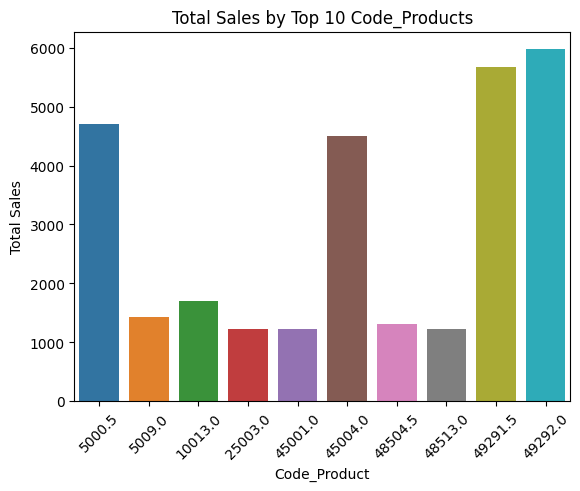

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the total sales for each Code_Product
code_sales = df.groupby('Code_Product')['Amount'].sum().reset_index()

# Sort the Code_Products by total sales in descending order
code_sales = code_sales.sort_values(by='Amount', ascending=False)

# Select the top 10 Code_Products
top_10_code_sales = code_sales.head(10)

# Create a bar plot of the total sales for the top 10 Code_Products
sns.barplot(data=top_10_code_sales, x='Code_Product', y='Amount')
plt.xlabel('Code_Product')
plt.ylabel('Total Sales')
plt.title('Total Sales by Top 10 Code_Products')
plt.xticks(rotation=45)
plt.show()

<ipython-input-50-3fedf7d60bde>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_products_data['Percentage of Unit Price Change'] = top_5_products_data.groupby('Code_Product')['Unit Price'].diff()


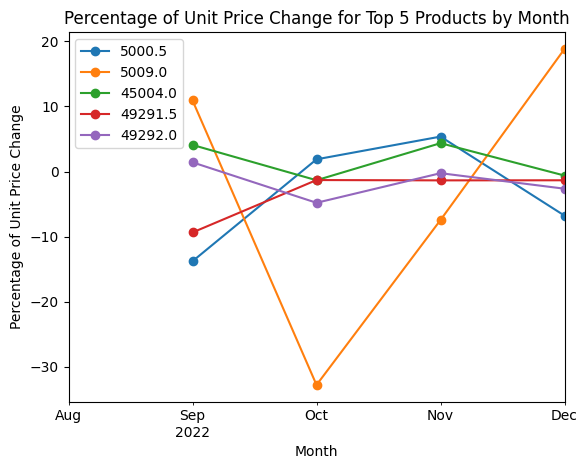

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'Code_Product' and calculate the average unit price for each month
grouped_df = df.groupby(['Code_Product', pd.Grouper(key='Date', freq='M')])['Unit Price'].mean().reset_index()

# Sort the products by total sales and select the top 5 products
top_5_products = df.groupby('Code_Product')['Total price'].sum().nlargest(5).index

# Filter the data to include only the rows corresponding to the top 5 products
top_5_products_data = grouped_df[grouped_df['Code_Product'].isin(top_5_products)]

# Calculate the Percentage of Unit Price Change for each product by subtracting the previous month's unit price from the current month's unit price
top_5_products_data['Percentage of Unit Price Change'] = top_5_products_data.groupby('Code_Product')['Unit Price'].diff()

# Create a new DataFrame to store the unit price change for each product by month
unit_price_change = top_5_products_data.pivot(index='Date', columns='Code_Product', values='Percentage of Unit Price Change')

# Visualize the unit price change using a line chart
unit_price_change.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Percentage of Unit Price Change')
plt.title('Percentage of Unit Price Change for Top 5 Products by Month')
plt.legend()
plt.show()

In [ ]:
# Calculate the percentage of unit price change for the top 5 products over time
percentage_change = top_5_products_data.groupby('Code_Product')['Unit Price'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

# Print the percentage of unit price change for the top 5 products over time
print(percentage_change)

Code_Product
5000.5    -13.845542
5009.0     -9.330167
45004.0    12.392162
49291.5   -23.490510
49292.0   -12.277039
Name: Unit Price, dtype: float64


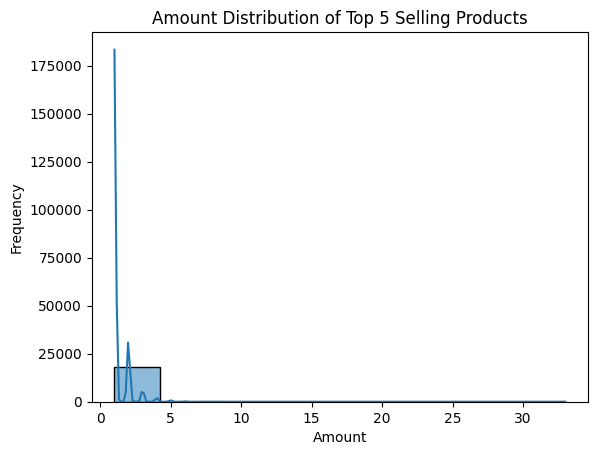

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame to include only the top 5 selling products based on the total amount
top_5_products = df.groupby('Code_Product')['Amount'].sum().nlargest(5).index
top_5_products_data = df[df['Code_Product'].isin(top_5_products)]

# Extract the 'Amount' column
amount_data = top_5_products_data['Amount']

# Create a histogram using seaborn
sns.histplot(data=amount_data, bins=10, kde=True)

# Set the labels and title of the plot
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Amount Distribution of Top 5 Selling Products')

# Display the histogram
plt.show()


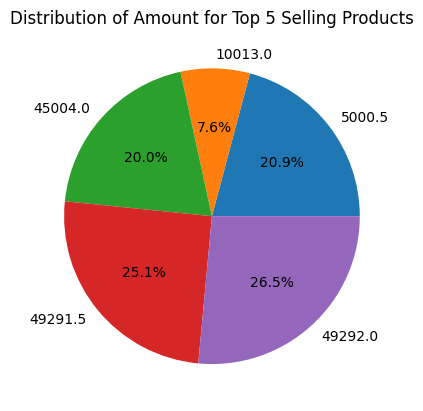

In [ ]:
import matplotlib.pyplot as plt

# Calculate the total amount for the top 5 selling products
total_amount = top_5_products_data['Amount'].sum()

# Calculate the percentage of each product's contribution to the total amount
percentage = top_5_products_data.groupby('Code_Product')['Amount'].sum() / total_amount * 100

# Create a pie chart to visualize the distribution of the amount for the top 5 selling products
fig, ax = plt.subplots()
ax.pie(percentage, labels=percentage.index, autopct='%1.1f%%')
ax.set_title('Distribution of Amount for Top 5 Selling Products')

# Display the pie chart
plt.show()

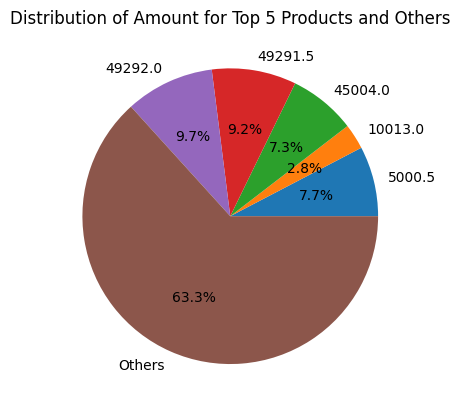

In [ ]:
import matplotlib.pyplot as plt

# Calculate the total amount for the top 5 selling products
total_amount_top5 = top_5_products_data['Amount'].sum()

# Calculate the total amount for the rest of the products
total_amount_others = df.loc[~df['Code_Product'].isin(top_5_products_data['Code_Product']), 'Amount'].sum()

# Create a DataFrame for the top 5 products and the "Others" category
data = pd.concat([top_5_products_data.groupby('Code_Product')['Amount'].sum(), pd.Series(total_amount_others, index=['Others'])], axis=0)

# Calculate the percentage of each category's contribution to the total amount
percentage = data / (total_amount_top5 + total_amount_others) * 100

# Create a pie chart to visualize the distribution of the amount
fig, ax = plt.subplots()
ax.pie(percentage, labels=percentage.index, autopct='%1.1f%%')
ax.set_title('Distribution of Amount for Top 5 Products and Others')

# Display the pie chart
plt.show()

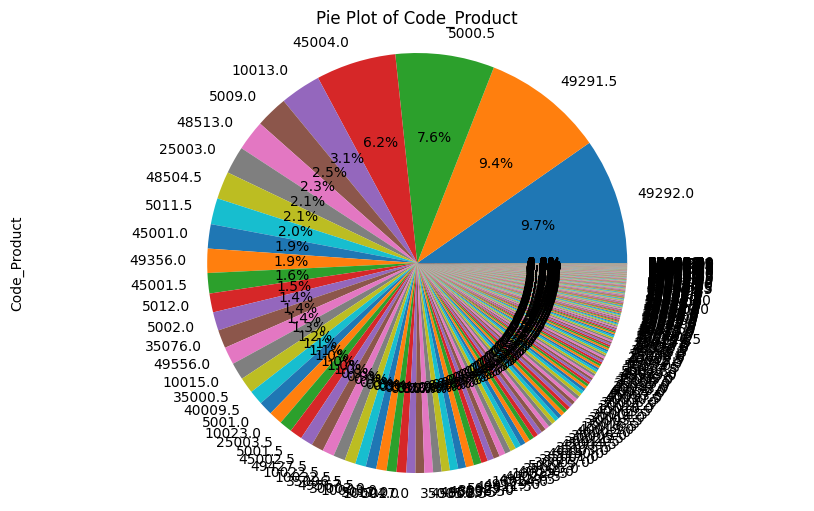

In [ ]:
# Pie plot
plt.figure(figsize=(10, 6))
df['Code_Product'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Pie Plot of Code_Product')
plt.show()

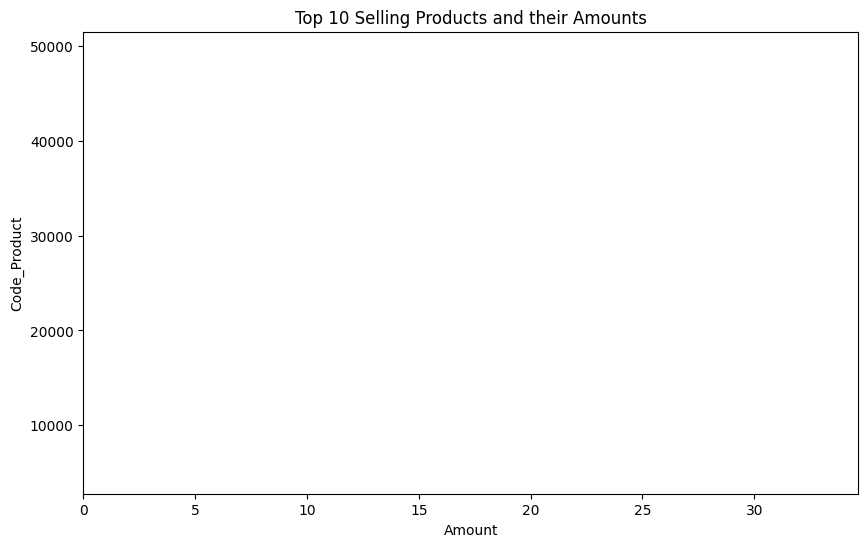

In [ ]:
# Group the data by Code_Product and calculate the total amount for each product
product_amounts = df.groupby('Code_Product')['Amount'].sum()

# Sort the products based on the total amount in descending order
sorted_products = product_amounts.sort_values(ascending=False)

# Select the top 10 selling products
top_10_products = sorted_products.head(10)

# Filter the original dataframe to include only the top 10 products
top_10_products_data = df[df['Code_Product'].isin(top_10_products.index)]

# Plot the horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_10_products_data['Code_Product'], top_10_products_data['Amount'])
plt.xlabel('Amount')
plt.ylabel('Code_Product')
plt.title('Top 10 Selling Products and their Amounts')
plt.show()

# **Machine Learning**

In [ ]:
# Create a pivot table with 'Main_ID', 'ItemKey', 'Transaction_ID'
pivot_table = pd.pivot_table(df, index='User_ID', columns='Code_Product', values='Transaction_ID', aggfunc='count')

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming you have a DataFrame called "pivot_table"

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
pivot_table_imputed = pd.DataFrame(imputer.fit_transform(pivot_table), index=pivot_table.index, columns=pivot_table.columns)
pivot_table_imputed

Code_Product,5000.5,5001.0,5001.5,5002.0,5002.5,5003.0,5004.0,5004.5,5005.0,5007.0,...,200035.5,200037.0,200037.5,200038.0,200038.5,200045.5,200046.0,200046.5,200047.0,350027.5
User_ID,,,,,,,,,,,,,,,,,,,,,
00024de6,1.20038,1.095436,1.043384,1.071212,1.0,1.0,1.0,1.052632,1.136364,1.0,...,1.142857,1.333333,1.111111,1.0,1.0,1.333333,1.0,1.0,1.0,1.0
00084856,1.20038,1.095436,1.043384,1.071212,1.0,1.0,1.0,1.052632,1.136364,1.0,...,1.142857,1.333333,1.111111,1.0,1.0,1.333333,1.0,1.0,1.0,1.0
0008e848,1.20038,1.095436,1.043384,1.071212,1.0,1.0,1.0,1.052632,1.136364,1.0,...,1.142857,1.333333,1.111111,1.0,1.0,1.333333,1.0,1.0,1.0,1.0
00096930,1.20038,1.095436,1.043384,1.071212,1.0,1.0,1.0,1.052632,1.136364,1.0,...,1.142857,1.333333,1.111111,1.0,1.0,1.333333,1.0,1.0,1.0,1.0
000c66b7,1.20038,1.095436,1.043384,1.000000,1.0,1.0,1.0,1.052632,1.136364,1.0,...,1.142857,1.333333,1.111111,1.0,1.0,1.333333,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff8b1c4,1.20038,1.095436,1.043384,1.071212,1.0,1.0,1.0,1.052632,1.136364,1.0,...,1.142857,1.333333,1.111111,1.0,1.0,1.333333,1.0,1.0,1.0,1.0
fff905d0,1.20038,1.095436,1.043384,1.071212,1.0,1.0,1.0,1.052632,1.136364,1.0,...,1.142857,1.333333,1.111111,1.0,1.0,1.333333,1.0,1.0,1.0,1.0
fff9726b,1.20038,1.095436,1.043384,1.071212,1.0,1.0,1.0,1.052632,1.136364,1.0,...,1.142857,1.333333,1.111111,1.0,1.0,1.333333,1.0,1.0,1.0,1.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Split the dataset into training and testing sets
train_data, test_data = train_test_split(pivot_table_imputed, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import NearestNeighbors

# Assuming you have the necessary datasets and imports

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(pivot_table_imputed, test_size=0.2, random_state=42)

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
pivot_table_imputed = pd.DataFrame(imputer.fit_transform(pivot_table), index=pivot_table.index, columns=pivot_table.columns)

# Train the Nearest Neighbors model
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(train_data)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
recommendations = {}
for i, user_id in enumerate(test_data.index):
    query_item = test_data.iloc[i].values.reshape(1, -1)

    # Find the k most similar users
    distances, indices = model.kneighbors(query_item, n_neighbors=5)

    # Get the recommended items from the similar users
    recommended_items = train_data.iloc[indices[0]].mean(axis=0).sort_values(ascending=False)

    # Store the recommendations for the user
    recommendations[user_id] = recommended_items.index.tolist()

In [ ]:
# Create a dataframe of recommendations
recommendations_df = pd.DataFrame.from_dict(recommendations, orient='index')

In [ ]:
# Here is the dataframe of the recommendations
recommendations_df

,0,1,2,3,4,5,6,7,8,9,...,323,324,325,326,327,328,329,330,331,332
71f5ac19,165016.5,200013.5,60047.5,60048.0,48522.5,200037.0,200045.5,200019.0,10006.0,60052.0,...,35021.5,35025.5,35030.0,35041.0,35042.0,35042.5,35049.0,35049.5,35071.0,350027.5
99c13412,165016.5,200013.5,60047.5,60048.0,48522.5,200037.0,200045.5,200019.0,10006.0,60052.0,...,35021.5,35025.5,35030.0,35041.0,35042.0,35042.5,35049.0,35049.5,35071.0,350027.5
1495306e,165016.5,200013.5,60047.5,60048.0,48522.5,200019.0,200037.0,10006.0,200045.5,60052.0,...,35025.5,35030.0,35041.0,35042.0,35042.5,35049.0,35049.5,35071.0,35071.5,350027.5
1e8febf7,165016.5,200013.5,60047.5,60048.0,48522.5,200045.5,200019.0,200037.0,10006.0,60052.0,...,35025.5,35030.0,35041.0,35042.0,35042.5,35049.0,35049.5,35071.0,35071.5,350027.5
5dbd02e7,165016.5,200013.5,60047.5,60048.0,48522.5,200037.0,200045.5,200019.0,10006.0,60052.0,...,35021.5,35025.5,35030.0,35041.0,35042.0,35042.5,35049.0,35049.5,35071.0,350027.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ed6ffb93,165016.5,200013.5,60047.5,60048.0,48522.5,200019.0,200037.0,10006.0,200045.5,60052.0,...,35025.5,35030.0,35041.0,35042.0,35042.5,35049.0,35049.5,35071.0,35071.5,350027.5
10505def,165016.5,200013.5,60047.5,60048.0,48522.5,200019.0,200037.0,10006.0,200045.5,60052.0,...,35025.5,35030.0,35041.0,35042.0,35042.5,35049.0,35049.5,35071.0,35071.5,350027.5
0377ca37,165016.5,200013.5,60047.5,60048.0,48522.5,200045.5,10006.0,200019.0,200037.0,60052.0,...,35025.5,35030.0,35041.0,35042.0,35042.5,35049.0,35049.5,35071.0,35071.5,350027.5
dbea5c3e,165016.5,200013.5,60047.5,60048.0,48522.5,200019.0,10006.0,200045.5,200037.0,60052.0,...,35025.5,35030.0,35041.0,35042.0,35042.5,35049.0,35049.5,35071.0,35071.5,350027.5
